In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman

ModuleNotFoundError: No module named 'python_utils_jjm'

In [5]:
reload(dlc_utils)

<module 'dlc_utils' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/dlc_utils.py'>

In [6]:
wt_cnmfe = ['30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '27-Feb_17_33_59_out.mat', '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat', '27-Mar_00_48_46_out.mat']
wt_dlc_tracking = ['GRIN013_H13_M33_S54','GRIN027_H13_M29_S44','GRIN026_H16_M35_S34','GRIN033_H13_M42_S33', 'GRIN032_H16_M49_S22','GRIN034_H15_M28_S2','GRIN035_H14_M40_S34']

In [7]:
ko_cnmfe = ['29-Mar_21_42_20_out.mat', '29-Mar_14_27_55_out.mat', '29-Mar_13_39_44_out.mat']
ko_dlc_tracking = ['GRIN018_H17_M41_S43', 'GRIN011_H10_M19_S59', 'GRIN012_H16_M57_S23']

In [35]:
genotype_dict = {}
for cnmfe_file, dlc_file in zip(ko_cnmfe, ko_dlc_tracking):

    #cnmfe data
    dir_path_cnmfe = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/' + cnmfe_file 
    CNMFE_results = sio.loadmat(dir_path_cnmfe)

    #behavior results
    interpolated = pd.read_csv('/volumes/My_Passport/dlc_analysis/behavcamvideos/' + dlc_file + '/' + dlc_file +'_dlc_tracking_foranalysis.csv')
    interpolated.set_index('Unnamed: 0', inplace=True)
    interpolated.index.rename('time(sec)', inplace=True)

    interpolated['msCam_index'] = np.linspace(0, len(interpolated)-1, len(interpolated))

    #interpolated
    print(dlc_file)
    print(interpolated.head())
    
    C_z_scored = utils_jjm.z_score_CNMFE(CNMFE_results['C'])
    
    print(len(C_z_scored[0]))
    
    correlation_coeffs = []
    try:
        for cell in C_z_scored:
            #print(len(cell))
            velocity = interpolated['centroid'].values
            correlation_coeffs.append(stats.pearsonr(cell, velocity[0:len(cell)]))
        genotype_dict[dlc_file] = correlation_coeffs
    except ValueError: 
        pass

GRIN018_H17_M41_S43
                 level_0  index  centroid  miniscope_light  ear_right  \
time(sec)                                                               
00:00:00           14.70  14.70  2.957956         7.933576   2.172861   
00:00:00.050000    16.18  16.18  2.917968         7.748875   2.093636   
00:00:00.100000    17.66  17.66  2.877979         7.564174   2.014411   
00:00:00.150000    19.14  19.14  2.837990         7.379473   1.935185   
00:00:00.200000    20.62  20.62  2.798001         7.194772   1.855960   

                 tail_base  ear_left  msCamFrame  msCam_index  
time(sec)                                                      
00:00:00          0.865862  4.076614         9.5          0.0  
00:00:00.050000   0.860235  4.126268        10.5          1.0  
00:00:00.100000   0.854609  4.175922        11.5          2.0  
00:00:00.150000   0.848982  4.225575        12.5          3.0  
00:00:00.200000   0.843355  4.275229        13.5          4.0  
21000
GRIN011_H10_M1

In [32]:
wt_corrs = []
for array in list(genotype_dict.keys()):
    wt_corrs.append([item[0] for item in genotype_dict[array]])
wt_cell_z_v_linear_r = np.concatenate(wt_corrs)

In [36]:
ko_corrs = []
for array in list(genotype_dict.keys()):
    wt_corrs.append([item[0] for item in genotype_dict[array]])
ko_cell_z_v_linear_r = np.concatenate(wt_corrs)

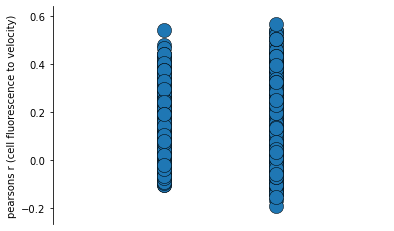

In [37]:
plt.scatter(np.concatenate([np.zeros(len(wt_cell_z_v_linear_r)),np.ones(len(ko_cell_z_v_linear_r))/2]), np.concatenate([wt_cell_z_v_linear_r, ko_cell_z_v_linear_r]),
           s=200, linewidths=.5, edgecolors='k')
plt.xlim([-.5, 1])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks([])
plt.ylabel('pearsons r (cell fluorescence to velocity)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.svg', transparent=True, format="svg")